In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import datetime
from pandas.plotting import scatter_matrix

from app import Bank
import app.utils

In [7]:
bank = Bank('DKB')
print(f'Bank: {bank.name}')

Bank: DKB


## Accounts

In [8]:
bank.accounts

,id,firstname,lastname,balance


## Transactions

In [9]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp


## Open Accounts

In [10]:
bank.open_account(account_id=1, firstname='Dalia', lastname='Das')
bank.open_account(account_id=2, firstname='Matthias', lastname='Rettenmeier')
bank.open_account(account_id=3, firstname='Manuel', lastname='Wiedenmann')

,id,firstname,lastname,balance
0,1,Dalia,Das,0.0
1,2,Matthias,Rettenmeier,0.0
2,3,Manuel,Wiedenmann,0.0


## Add transactions

In [11]:
bank.add_transaction(transaction_id=0,
                     sender_id=1,
                     recipient_id=2,
                     subject='Mein Weltbild',
                     amount=100.0,
                     category='Bücher',
                     timestamp=datetime.datetime.utcnow())

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831


In [12]:
transactions = [
    {'transaction_id': 1,
     'sender_id': 1,
     'recipient_id': 2,
     'subject': 'Data Science für Dummies',
     'amount': 26.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 2,
     'sender_id': 1,
     'recipient_id': 3,
     'subject': 'Python programmieren lernen für Dummies',
     'amount': 19.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 3,
     'sender_id': 3,
     'recipient_id': 1,
     'subject': 'Mittagessen',
     'amount': 20.,
     'category': 'Essen',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 4,
     'sender_id': 2,
     'recipient_id': 3,
     'subject': 'Drinks',
     'amount': 40.,
     'category': 'Lifestyle',
     'timestamp': app.utils.random_timestamp()},
]

for transaction in transactions:
    bank.add_transaction(**transaction)
    
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-04-11 12:38:01.594355
3,3,3,1,20.00,Mittagessen,Essen,2018-11-23 12:38:01.594366
4,4,2,3,40.00,Drinks,Lifestyle,2018-10-09 12:38:01.594370


In [56]:
bank.transactions.describe()

,amount
count,5.000000
mean,41.396000
std,33.763575
min,19.990000
25%,20.000000
50%,26.990000
75%,40.000000
max,100.000000


## .groupby() + agg()

In [61]:
grouped_by_sender = bank.transactions.groupby('sender_id') 


In [65]:
grouped_by_sender.agg({'id':'count','amount': 'min'})

,id,amount
sender_id,,
1,3,19.99
2,1,40.00
3,1,20.00


In [63]:
grouped_by_category.agg({'amount': 'sum'})

,amount
recipient_id,
1,20.00
2,126.99
3,59.99


In [49]:
grouped_by_category.agg({'amount': 'max'})

,amount
recipient_id,
1,20.0
2,100.0
3,40.0


In [50]:
grouped_by_category.agg({'amount': 'min'})

,amount
recipient_id,
1,20.00
2,26.99
3,19.99


### Tasks

- Group by sender_id
- Group by recipient_id


## Cleanup

In [72]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-04-11 12:38:01.594355
4,4,2,3,40.00,Drinks,Lifestyle,2018-10-09 12:38:01.594370
3,3,3,1,20.00,Mittagessen,Essen,2018-11-23 12:38:01.594366
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831


In [68]:
bank.transactions.drop_duplicates('id', inplace=True)

In [69]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-04-11 12:38:01.594355
3,3,3,1,20.00,Mittagessen,Essen,2018-11-23 12:38:01.594366
4,4,2,3,40.00,Drinks,Lifestyle,2018-10-09 12:38:01.594370


In [70]:
bank.transactions.sort_values('timestamp', inplace=True)

In [71]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-04-11 12:38:01.594355
4,4,2,3,40.00,Drinks,Lifestyle,2018-10-09 12:38:01.594370
3,3,3,1,20.00,Mittagessen,Essen,2018-11-23 12:38:01.594366
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831


## Add columns

In [73]:
# Wir erstellen eine neue Column tax_amount indem wir die Column amount mit 0.19 multiplizieren
bank.transactions['tax_amount'] = bank.transactions['amount'] * 0.19

In [74]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853,5.1281
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-04-11 12:38:01.594355,3.7981
4,4,2,3,40.00,Drinks,Lifestyle,2018-10-09 12:38:01.594370,7.6000
3,3,3,1,20.00,Mittagessen,Essen,2018-11-23 12:38:01.594366,3.8000
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831,19.0000


### Tasks

- [.apply() docs](http://pandas.pydata.org/pandas-docs/version/0.24/reference/api/pandas.DataFrame.apply.html)

In [77]:
# Unser dict zum Zuordnen der richtigen Steuersätze
# Key ist die Category, der value ist der Stuersatz
tax_rates = {
    'Bücher': 0.07,
    'Essen': 0.07,
    'Lifestyle': 0.19,
}

tax_rates['Bücher']

# Erstelle eine neue Column tax_rate indem du auf der Column category .apply() aufrufst
# Nutze das tax_rates dict in der lambda function von .apply()
bank.transactions['tax_rate'] = bank.transactions['category'].apply(lambda category: tax_rates[category])


In [79]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853,5.1281,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-04-11 12:38:01.594355,3.7981,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-10-09 12:38:01.594370,7.6000,0.19
3,3,3,1,20.00,Mittagessen,Essen,2018-11-23 12:38:01.594366,3.8000,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831,19.0000,0.07


In [82]:
# Berechne nun den richtigen tax_amount auf Grundlage der tax_rate Column
bank.transactions['tax_amount'] = bank.transactions['amount'] * bank.transactions['tax_rate']

In [83]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853,1.8893,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-04-11 12:38:01.594355,1.3993,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-10-09 12:38:01.594370,7.6000,0.19
3,3,3,1,20.00,Mittagessen,Essen,2018-11-23 12:38:01.594366,1.4000,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831,7.0000,0.07


## Filter with .loc[]

In [84]:
# Filter alle Bücher
bank.transactions.loc[bank.transactions['category'] == 'Bücher']

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853,1.8893,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-04-11 12:38:01.594355,1.3993,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831,7.0000,0.07


In [86]:
# Filter alle Transaktionen mit einem amount > 20

bank.transactions.loc[bank.transactions['amount'] >20.0]

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853,1.8893,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-10-09 12:38:01.594370,7.6000,0.19
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831,7.0000,0.07


In [88]:
# Filter alle Bücher mit einem amount > 20

# Erst die Bücher
books = bank.transactions.loc[bank.transactions['category'] == 'Bücher']

# Dann den amount
books_with_amount_greater_20 = books.loc[bank.transactions['amount']>20] 

books_with_amount_greater_20

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 12:38:01.592853,1.8893,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831,7.0000,0.07


In [128]:
# Filter alle Transaktionen nach einem Datum (timestamp)
timestamp = app.utils.random_timestamp()

transactions_nachdatum = bank.transactions.loc[bank.transactions['timestamp'] >timestamp]

transactions_nachdatum



,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
4,4,2,3,40.0,Drinks,Lifestyle,2018-10-09 12:38:01.594370,7.6,0.19
3,3,3,1,20.0,Mittagessen,Essen,2018-11-23 12:38:01.594366,1.4,0.07
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 12:38:00.984831,7.0,0.07


## Plots

In [129]:
by_timestamp = bank.transactions.set_index('timestamp')
by_timestamp_clean = by_timestamp.drop(['category','id','sender_id','recipient_id'], axis=1)
by_timestamp_clean

,amount,subject,tax_amount,tax_rate
timestamp,,,,
2018-04-11 12:38:01.592853,26.99,Data Science für Dummies,1.8893,0.07
2018-04-11 12:38:01.594355,19.99,Python programmieren lernen für Dummies,1.3993,0.07
2018-10-09 12:38:01.594370,40.00,Drinks,7.6000,0.19
2018-11-23 12:38:01.594366,20.00,Mittagessen,1.4000,0.07
2019-02-11 12:38:00.984831,100.00,Mein Weltbild,7.0000,0.07


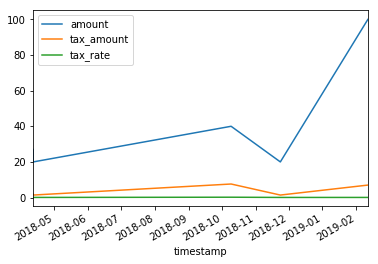

In [130]:
by_timestamp_clean.plot()